In [2]:
s3_data ="s3://aegovan-data/test_unique_pub_v3_lessnegatve_predicted_linear.json"
data_dir = "temp"

In [55]:
!rm -rf $data_dir
!mkdir $data_dir
!aws s3 cp s3://aegovan-data/results/model_CnnPos_190412_2028 $data_dir --recursive --exclude "*"  --include "*.json" --exclude "*vocab.json" --include "*.log"

download: s3://aegovan-data/results/model_CnnPos_190412_2028/classes.json to temp/classes.json
download: s3://aegovan-data/results/model_CnnPos_190412_2028/feature_lens.json to temp/feature_lens.json
download: s3://aegovan-data/results/model_CnnPos_190412_2028/training_scores_epoch_Objectdump_20190412_233502_900087f9-3b3f-426f-824a-c62ff0b40371.json to temp/training_scores_epoch_Objectdump_20190412_233502_900087f9-3b3f-426f-824a-c62ff0b40371.json
download: s3://aegovan-data/results/model_CnnPos_190412_2028/validation_scores_epoch_Objectdump_20190412_233502_159e0f16-22cc-4771-a69e-fc525f5bfade.json to temp/validation_scores_epoch_Objectdump_20190412_233502_159e0f16-22cc-4771-a69e-fc525f5bfade.json
download: s3://aegovan-data/results/model_CnnPos_190412_2028/run.log to temp/run.log
download: s3://aegovan-data/results/model_CnnPos_190412_2028/predicted_val_unique_pub_v4_less_negative.json to temp/predicted_val_unique_pub_v4_less_negative.json
download: s3://aegovan-data/results/model_CnnP

In [56]:
!ls  $data_dir

classes.json
feature_lens.json
predicted_test_unique_pub_v4_less_negative.json
predicted_val_unique_pub_v4_less_negative.json
run.log
training_scores_epoch_Objectdump_20190412_233502_900087f9-3b3f-426f-824a-c62ff0b40371.json
validation_scores_epoch_Objectdump_20190412_233502_159e0f16-22cc-4771-a69e-fc525f5bfade.json


In [57]:
!head -1 $data_dir/run.log 

commit d6193e8747e4863b83109271c8b3954418a6f76c


In [58]:
!head -10 $data_dir/run.log | tail -8

Date:   Tue Apr 9 14:08:08 2019 -0700

    Add alternative uniprot
{'network': 'CnnPos', 'trainjson': '/data/train_unique_pub_v4_less_negative.json', 'valjson': '/data/val_unique_pub_v4_less_negative.json', 'embedding': '/data/wikipedia-pubmed-and-PMC-w2v.bin.txt', 'embeddim': 200, 'outdir': '/data/model_CnnPos_190412_2028', 'epochs': 100, 'interaction_type': None, 'log_level': 'INFO'}
2019-04-12 20:28:59,681 - __main__ - INFO - Running with interaction type None, network CnnPos
2019-04-12 20:28:59,918 - __main__ - INFO - Training shape (4708, 4), test shape (674, 4)
2019-04-12 20:28:59,918 - __main__ - INFO - The embedding header is 5443656 200



In [59]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 10000)
pd.set_option('display.max_rows', 100)

In [60]:
import boto3

def download_single_file(bucket_name_path, local_path):
    index = bucket_name_path.find("://")

    # remove the s3:// if present
    if index > -1:
        bucket_name_path = bucket_name_path[index + 3:]

    key_start_index = bucket_name_path.find("/")
    bucket_name = bucket_name_path
    key = "/"
    if key_start_index > -1:
        bucket_name = bucket_name_path[0:key_start_index]
        key = bucket_name_path[key_start_index + 1:]
        
    client = boto3.resource('s3')
    client.Bucket(bucket_name).download_file(key, local_path)



In [80]:
import glob

results_file = "./temp/predicted_val_unique_pub_v4_less_negative.json"
validation_fit_file = glob.glob("temp/validation_scores_epoch_Objectdump*.json")[0]
train_fit_file = glob.glob("temp/training_scores_epoch_Objectdump*.json")[0]


pos_label = True

In [81]:
#download_single_file(s3_data, results_file)

In [82]:
import pandas as pd

In [83]:
df_results = pd.read_json(results_file)
df_results["actual"] = df_results["isValid"]

In [84]:
df_results.head(n=1)


,entityMentionsCount,hasTriggerWord,interactionId,interactionType,isValid,lessThanThreshold,participant1Alias,participant1Id,participant2Alias,participant2Id,participants_count,pubmedId,pubmedTitle,pubmedabstract,normalised_abstract,particpant1Exists,particpant2Exists,predicted,confidence_scores,actual
0,3,True,1194844_6ebe234c-461c-4f6c-aa94-470d4cb5e06d_fake_interaction,methylation,False,True,"[[prkx_human], [cAMP-dependent protein kinase catalytic subunit PRKX], [PRKX], [PKX1], [Protein kinase PKX1]]",P51817,"[[prkx_human], [cAMP-dependent protein kinase catalytic subunit PRKX], [PRKX], [PKX1], [Protein kinase PKX1]]",P51817,1,16491121,None,"To gain insight into the function of human protein kinase X (PrKX), a signal-transduction protein required for macrophage differentiation, we identified regulatory subunit I alpha of protein kinase A, T54 and Smad6 as partners for this protein using a yeast two-hybrid interaction screen. Interactions between PrKX and these proteins were substantiated by co-immunoprecipitation. Interaction between Smad6 and PrKX was also confirmed in human myeloid HL-60 cells following their phorbol 12-myristate 13-acetate (PMA)-induced differentiation into macrophages. In vitro phosphorylation assays demonstrated that PrKX phosphorylates Smad6 at a serine residue. Mutagenesis of this site resulted in abrogation of PrKX phosphorylation. Both PrKX and Smad6 were shown to be co-localized to the nuclear compartment of HL-60 cells during their macrophage differentiation where PrKX levels are induced and Smad6 protein levels remain relatively constant while levels of serine phosphorylation of Smad6 increase. By using in vitro electrophoretic mobility shift assays and in vivo chromatin immunoprecipitation, we also demonstrate that during macrophage differentiation Smad6 displays an increased binding to the human osteopontin, Id2, and Hex gene promoters, which correlates to an observed increased expression of these genes. Finally, vector-based RNA interference experiments established that both Smad6 and PrKX proteins are required for PMA-induced cell attachment and spreading.","To gain insight into the function of human P51817 (P51817), a signal-transduction protein required for macrophage differentiation, we identified regulatory subunit I alpha of protein kinase A, Q92917 and O43541 as partners for this protein using a yeast two-hybrid interaction screen. Interactions between P51817 and these proteins were substantiated by co-immunoprecipitation. Interaction between O43541 and P51817 was also confirmed in human myeloid HL-60 cells following their phorbol 12-myristate 13-acetate (PMA)-induced differentiation into macrophages. In vitro phosphorylation assays demonstrated that P51817 phosphorylates O43541 at a serine residue. Mutagenesis of this site resulted in abrogation of P51817 phosphorylation. Both P51817 and O43541 were shown to be co-localized to the nuclear compartment of HL-60 cells during their macrophage differentiation where P51817 levels are induced and O43541 protein levels remain relatively constant while levels of serine phosphorylation of O43541 increase. By using in vitro electrophoretic mobility shift assays and in vivo chromatin immunoprecipitation, we also demonstrate that during macrophage differentiation O43541 displays an increased binding to the human P10451, Q02363, and Q03014 gene promoters, which correlates to an observed increased expression of these genes. Finally, vector-based RNA interference experiments established that both O43541 and P51817 proteins are required for PMA-induced cell attachment and spreading.",True,True,True,"{'False': -0.9174600244000001, 'True': -0.5100468993}",False


## Analyse Results

In [85]:
df = df_results

In [86]:
df_results.shape

(674, 20)

In [87]:
import math

# This is log softmax, convert to softmax prob
df["true"]  =df["confidence_scores"].apply(lambda x: math.exp(x["True"]))
df["false"]  =df["confidence_scores"].apply(lambda x: math.exp(x["False"]))

df[ ["true", "false", "actual", "predicted", "confidence_scores"]].sort_values(["true"], ascending=False).head(n=3)

,true,false,actual,predicted,confidence_scores
671,0.689586,0.310414,True,True,"{'False': -1.1698482037, 'True': -0.3716639876}"
76,0.689586,0.310414,False,True,"{'False': -1.1698482037, 'True': -0.3716639876}"
370,0.682893,0.317107,False,True,"{'False': -1.1485165358, 'True': -0.3814168274}"


In [88]:
from sklearn.metrics import f1_score, accuracy_score

f1 = f1_score(df["actual"], df["predicted"])  
accuracy = accuracy_score(df["actual"], df["predicted"], sample_weight=None)
print("The F1 score is {} and the accuracy is {}".format(f1, accuracy))

The F1 score is 0.48484848484848486 and the accuracy is 0.5964391691394659


In [89]:
!pip install scikit-plot==0.3.7

awsebcli 3.12.4 has requirement requests<=2.9.1,>=2.6.1, but you'll have requests 2.18.4 which is incompatible.
You are using pip version 10.0.1, however version 19.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


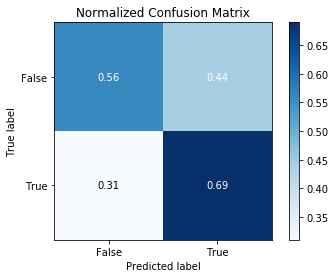

In [90]:
import matplotlib.pyplot as plt
import scikitplot as skplt

skplt.metrics.plot_confusion_matrix(df["actual"], df["predicted"], normalize=True )
plt.show()

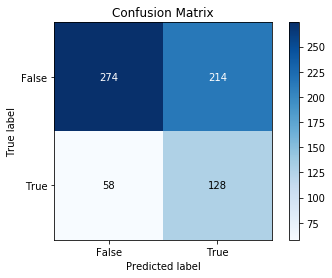

In [91]:
import matplotlib.pyplot as plt
import scikitplot as skplt

skplt.metrics.plot_confusion_matrix(df["actual"], df["predicted"], normalize=False )
plt.show()

methylation
acetylation
phosphorylation
dephosphorylation
demethylation
deubiquitination
ubiquitination


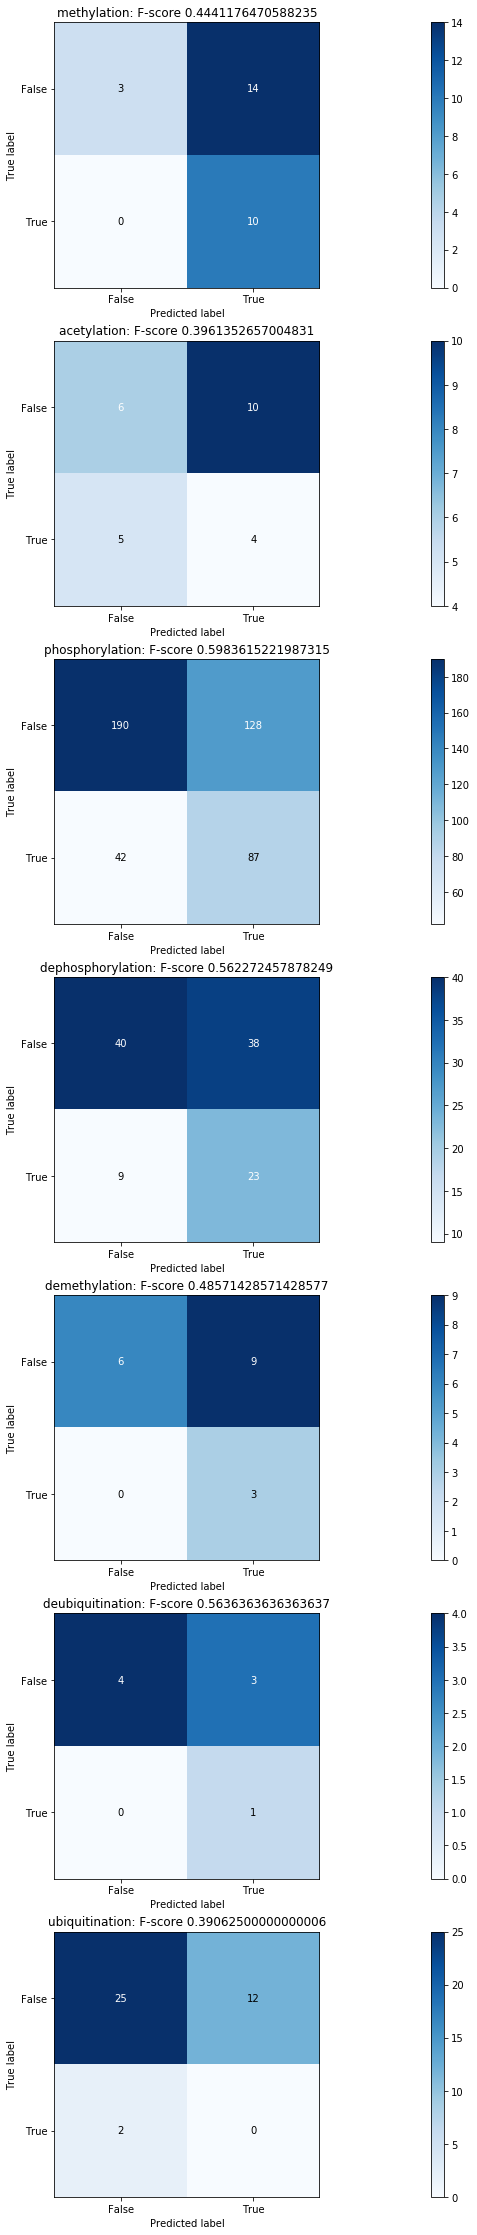

In [92]:
interactions = df["interactionType"].unique()
#fig, ax = plt.subplots(1, len(interactions), figsize=(40,40), squeeze=False, sharey=True, sharex=True)
fig = plt.figure(figsize=(40,40))
gs = fig.add_gridspec(7, 1)
#ax = fig.add_axes([0,0,1,1])
i = 0
for interaction in interactions:
    print(interaction)
    df_interaction_type = df.query("interactionType == '{}'".format(interaction))
    ax1 = fig.add_subplot(gs[i, 0])
    


    f1 = f1_score(df_interaction_type["actual"], df_interaction_type["predicted"], average='macro')  
    accuracy = accuracy_score(df_interaction_type["actual"], df_interaction_type["predicted"], sample_weight=None)
    skplt.metrics.plot_confusion_matrix(df_interaction_type["actual"], df_interaction_type["predicted"], normalize=False, title = "{}: F-score {}".format(interaction,f1), ax= ax1)
    
#     ax2 = fig.add_subplot(gs[i, 1])
#     skplt.metrics.plot_confusion_matrix(df_interaction_type["actual"], df_interaction_type["predicted"], normalize=False, title = "{}: F-score {}".format(interaction,f1), ax= ax2)


    i += 1
    #break

plt.savefig("confusionmatrix_.jpg", bbox_inches='tight')
plt.show()
    
    


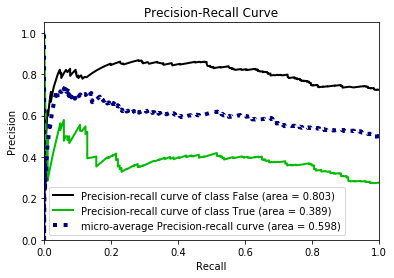

In [93]:
import matplotlib.pyplot as plt
import scikitplot as skplt

skplt.metrics.plot_precision_recall(df["actual"], df[["false", "true"]])

## Training / Validation epoch fit

In [94]:
import json
import pandas as pd
from pandas.io.json import json_normalize

def load_as_df (file):
    with open(file, "r") as i:
        data = json.loads(i.read())
        
    return json_normalize(data)
    

In [95]:
df_train_fit = load_as_df(train_fit_file)
df_train_fit.sort_values(["score.f-score"], ascending=False).head(n=10)

,epoch,score.accuracy,score.f-score,score.precision,score.recall
90,90,0.808624,0.601151,0.672944,0.5432
95,95,0.812234,0.600362,0.690229,0.5312
94,94,0.812022,0.599366,0.690302,0.5296
99,99,0.809898,0.596301,0.683557,0.5288
92,92,0.808411,0.596240,0.676829,0.5328
84,84,0.807986,0.593525,0.677618,0.5280
81,81,0.807349,0.591993,0.676259,0.5264
85,85,0.807986,0.590580,0.680585,0.5216
88,88,0.807562,0.590045,0.679167,0.5216
98,98,0.805650,0.589502,0.671093,0.5256


In [96]:
df_val_fit = load_as_df(validation_fit_file)
df_val_fit.sort_values(["score.precision"], ascending=False).head(n=10)

,epoch,score.accuracy,score.f-score,score.precision,score.recall
25,25,0.735905,0.183486,0.625000,0.107527
40,40,0.729970,0.125000,0.590909,0.069892
23,23,0.728487,0.107317,0.578947,0.059140
36,36,0.728487,0.115942,0.571429,0.064516
37,37,0.728487,0.115942,0.571429,0.064516
19,19,0.737389,0.305882,0.565217,0.209677
28,28,0.729970,0.180180,0.555556,0.107527
44,44,0.731454,0.255144,0.543860,0.166667
39,39,0.725519,0.131455,0.518519,0.075269
59,59,0.725519,0.177778,0.512821,0.107527


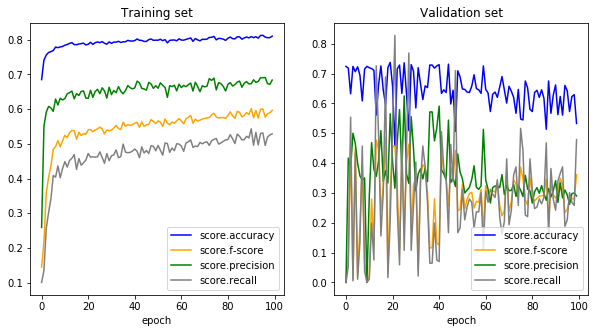

In [97]:
fig, ax = plt.subplots(1,2, figsize=(10,5))

df_train_fit.plot.line(x="epoch", y="score.accuracy", ax = ax[0], color ="blue")
df_train_fit.plot.line(x="epoch", y="score.f-score", ax = ax[0], color="orange")
df_train_fit.plot.line(x="epoch", y="score.precision", ax = ax[0], color ="green")
df_train_fit.plot.line(x="epoch", y="score.recall", ax = ax[0], color ="gray")
ax[0].set_title("Training set")
ax[0].yaxis.set_major_locator(plt.FixedLocator([0,.1,.2,.3,.4,.5,.6, .7,.8,.9,1]))

df_val_fit.plot.line(x="epoch", y="score.accuracy", ax = ax[1], color="blue")
df_val_fit.plot.line(x="epoch", y="score.f-score", ax = ax[1], color ="orange")
df_val_fit.plot.line(x="epoch", y="score.precision", ax = ax[1], color ="green")
df_val_fit.plot.line(x="epoch", y="score.recall", ax = ax[1], color ="gray")
ax[1].set_title("Validation set")
ax[1].yaxis.set_major_locator(plt.FixedLocator([0,.1,.2,.3,.4,.5,.6, .7,.8,.9,1]))



plt.show()